<a href="https://colab.research.google.com/github/zie225/-Voting-Bagging-random-forest/blob/master/FINAL_NATURAL_LANGAGE_PROCESSING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# COMPARISON OF TWO MODEL OF DEEP LEARNING FOR ABSTRACT SUMMARIZATION


In [ ]:
!pip install flags

In [ ]:
import ast

import pandas as pd
import numpy as np
from collections import defaultdict
import collections
import gensim

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.multioutput import MultiOutputClassifier                  # included from scikit-learn version 0.18.1 and onwards
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import json
import numpy as np
import pandas as pd
import gensim
import networkx as nx
import collections

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re 
from collections import Counter
from pprint import pprint
from gensim.models import CoherenceModel
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Plotting tools

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# for Mac
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
import re

import re
import os
import time
import numpy as np
import pandas as pd 
import unicodedata
import tensorflow as tf
import tensorflow.keras as krs
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
import csv

BUFFER_SIZE = 20000
BATCH_SIZE = 64
embedding_dim = 50 # first it was 200

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.feature_extraction import stop_words
import re
import string
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys, tarfile
from sklearn.model_selection import train_test_split

from IPython.display import Image
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer,text_to_word_sequence 
from keras.preprocessing.sequence import pad_sequences
#from keras.layers import Input,Dense, Activation, concatenate, Embedding, Flatten, CuDNNLSTM, Bidirectional, Concatenate
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K
from keras import optimizers
from absl import app
from absl import flags
import absl.logging as _logging  # pylint: disable=unused-import

pd.set_option('display.max_colwidth', 200)

In [ ]:
# Cloud TPU Cluster Resolvers
flags.DEFINE_string(
    'tpu', default=None,
    help='The Cloud TPU to use for training. This should be either the name '
    'used when creating the Cloud TPU, or a grpc://ip.address.of.tpu:8470 url.')
flags.DEFINE_string(
    "gcp_project", default=None,
    help="Project name for the Cloud TPU-enabled project. If not specified, we "
    "will attempt to automatically detect the GCE project from metadata.")
flags.DEFINE_string(
    "tpu_zone", default=None,
    help="GCE zone where the Cloud TPU is located in. If not specified, we "
    "will attempt to automatically detect the GCE project from metadata.")

# Model specific paramenters
flags.DEFINE_integer("batch_size", 128,
                     "Mini-batch size for the computation. Note that this "
                     "is the global batch size and not the per-shard batch.")
flags.DEFINE_float("learning_rate", 0.05, "Learning rate.")
flags.DEFINE_string("train_file", "", "Path to cifar10 training data.")
flags.DEFINE_integer("train_steps", 1000000,
                     "Total number of steps. Note that the actual number of "
                     "steps is the next multiple of --iterations greater "
                     "than this value.")
flags.DEFINE_bool("use_tpu", True, "Use TPUs rather than plain CPUs")
flags.DEFINE_string("model_dir", None, "Estimator model_dir")
flags.DEFINE_integer("iterations_per_loop", 100,
                     "Number of iterations per TPU training loop.")
flags.DEFINE_integer("num_shards", 8, "Number of shards (TPU chips).")


FLAGS = flags.FLAGS

In [ ]:
parsed_sites = 'PubAg.json'

with open(parsed_sites, "r") as read_file:
    abstract_dict = json.load(read_file)

In [ ]:
df= pd.DataFrame.from_dict(abstract_dict)
df.head()

In [ ]:
#from sklearn.utils import shuffle
# shuffling the data 
#df= shuffle(df)
#df.head()

In [ ]:
df=df[df['abstracts'].isnull()==False]
df=df[df['titles'].isnull()==False]
df=df[df['abstracts']!='nan']

df.drop_duplicates(subset=['abstracts'],inplace=True)  #dropping duplicates

In [ ]:
import nltk
nltk.download('stopwords')

**DATA CLEANING**

In [ ]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    str = text.lower()
    str = BeautifulSoup(str, "lxml").text
    str = re.sub(r'\([^)]*\)', '', str)
    str = re.sub('"','', str)
    str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])    
    str = re.sub(r"'s\b","",str)
    str = re.sub("[^a-zA-Z]", " ", str) 
    str = re.sub('[m]{2,}', 'mm', str)
    if(num==0):
        str = re.sub(r'\.',' . ',str)
    if(num==0):
        tokens = [w for w in str.split() if not w in stop_words]
      
    else:
        
        tokens=str.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short words
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [ ]:
#call the function
clean_text = []
for t in df['titles']:
    clean_text.append(text_cleaner(t,0))

In [ ]:
#call the function
clean_summary = []
for t in df['abstracts']:
    clean_summary.append(text_cleaner(t,0))

In [ ]:
df['titles']=clean_text
df['abstracts']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

In [ ]:
df.head()



**Analyzing the sequence distribution**

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['titles']:
    temp=i.split()
    text_word_count.append(len(temp))

for j in df['abstracts']:
  #print(j)
    temp1=j.split()
    headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'titles':text_word_count, 'abstracts':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [ ]:
# From the graph
# We can fix maximum length of text = 150 since most of the abstracts have a length of 150 and maximum titles length of 50, since maximum Titles are of size 40

max_len_abstracts= 150
max_len_titles=50

In [ ]:
cnt=0
for i in df['abstracts']:
    if(len(i.split())<=150):
        cnt=cnt+1
print(cnt/len(df['abstracts']))

In [ ]:
titles1 =np.array(df['titles'])
abstracts1=np.array(df['abstracts'])

short_titles=[]
short_summary=[]

for i in range(len(titles1)):
    if(len(abstracts1[i].split())<=50 and len(titles1[i].split())<=150):
        short_titles.append(titles1[i])
        short_summary.append(abstracts1[i])
        
df=pd.DataFrame({'titles':short_titles,'summary':short_summary})

In [ ]:
# Validating the lengths

titles1 =np.array(df['titles'])
abstract1=np.array(df['summary'])


for i in range(len(titles1)):
    if(len(abstract1[i].split())>=150):
        print(i)

In [ ]:
print(df['titles'][400],df['summary'][400],sep='\n')



*Splitting data into train, test -- 70 - 30*


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['titles'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
print(len(x_train))
print(len(x_test))

he full process for preparing the data is:


1.       Read text file and split into lines, split lines into pairs

2.       Normalize text, filter by length and content

3.       Make word lists from sentences in pairs

   


In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
def readLangs(titles, summary, reverse=False):
    print("Reading lines...")
    
    # Split every line into pairs and normalize
    titles=np.array(titles)
    summary=np.array(summary)
    pairs = [[titles[i],summary[i]] for i in range(len(summary))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(titles)
        output_lang = Lang(summary)
    else:
        input_lang = Lang(summary)
        output_lang = Lang(titles)

    return input_lang, output_lang, pairs

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [ ]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
#print(random.choice(pairs))

In [ ]:
pairs[1]

In [ ]:
pairs[2]

In [ ]:
pairs[3]

**DEEP LEARNING MODEL**

# LSTM(Long Short Term Memory) model

**Abstractive Summarization with LSTM(Long Short Term Memory):**

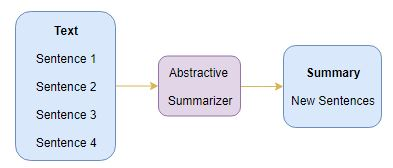

Abstractive summarization is the technique of generating a summary of a text from its main ideas, not by copying verbatim most salient sentences from text. There have been many different algorithms and methods for performing this task including the use of RNNs with **LSTM** MODEL.

In [ ]:
SOS_token = 0
EOS_token = 1

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Encoder and Decoder diagram:**

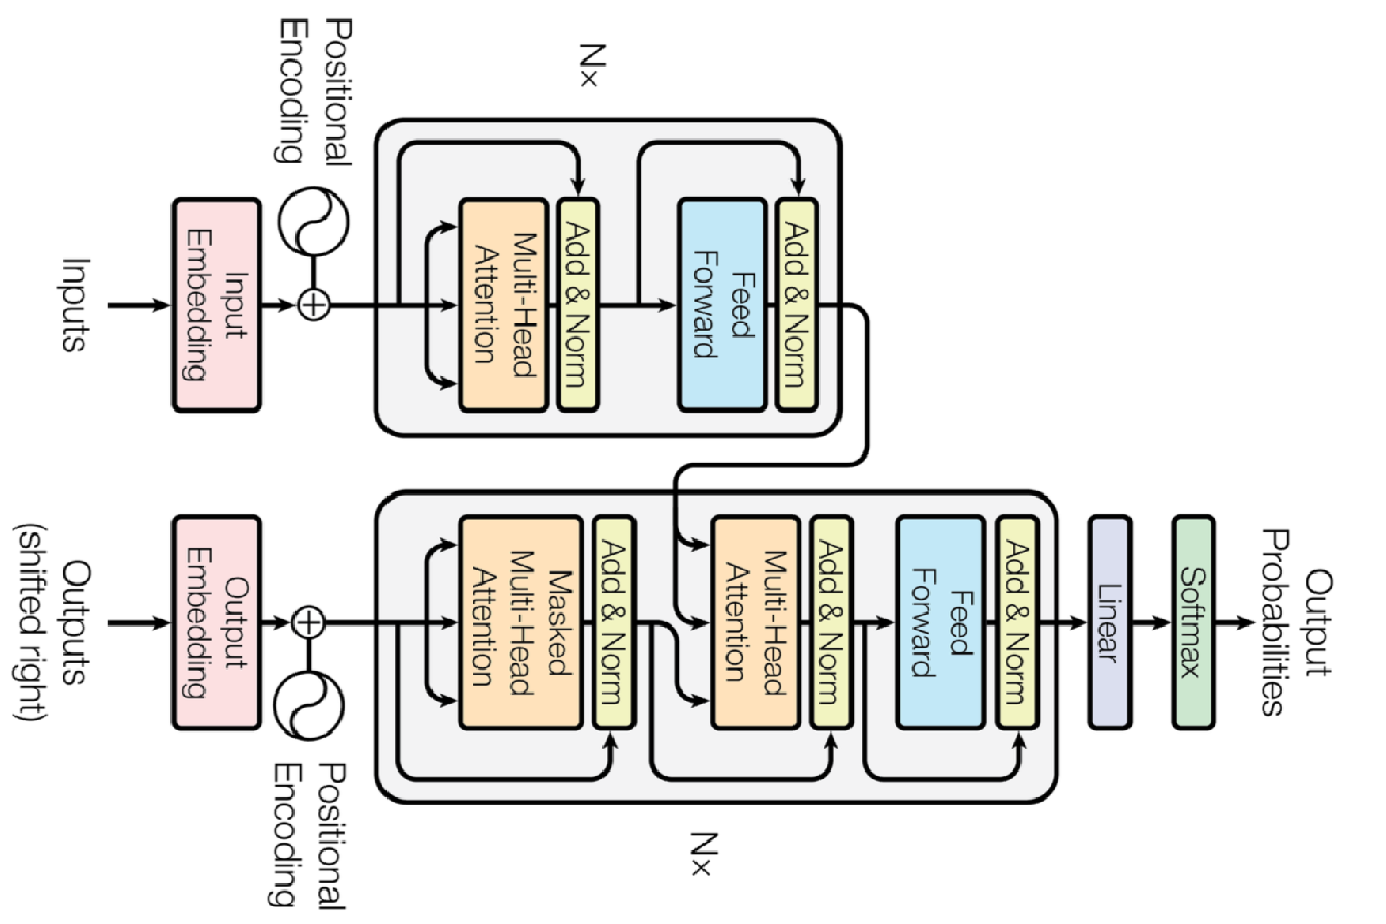

# **`The Seq2Seq Model`**

*The encoder*

The encoder of a seq2seq network is a RNN that outputs some value for every word from the input sentence. For every input word the encoder outputs a vector and a hidden state, and uses the hidden state for the next input word.

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.LSTM(output, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size, device=device),torch.zeros(1, 1, self.hidden_size, device=device))

*Decoder*

The decoder is another RNN that takes the encoder output vector(s) and outputs a sequence of words for summarization.

*Simple Decoder*

In the simplest seq2seq decoder we use only last output of the encoder. This last output is sometimes called the context vector as it encodes context from the entire sequence. This context vector is used as the initial hidden state of the decoder.

At every step of decoding, the decoder is given an input token and hidden state. The initial input token is the start-of-string <SOS> token, and the first hidden state is the context vector (the encoder’s last hidden state).

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
MAX_LENGTH=150

# **Attention Decoder**

If only the context vector is passed betweeen the encoder and decoder, that single vector carries the burden of encoding the entire sentence.

Attention allows the decoder network to “focus” on a different part of the encoder’s outputs for every step of the decoder’s own outputs. First we calculate a set of attention weights. These will be multiplied by the encoder output vectors to create a weighted combination. The result (called `attn_applied` in the code) should contain information about that specific part of the input sequence, and thus help the decoder choose the right output words

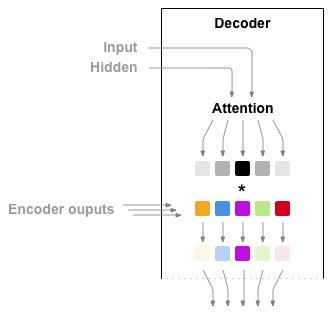

Calculating the attention weights is done with another feed-forward layer `attn`, using the decoder’s input and hidden state as inputs. Because there are sentences of all sizes in the training data, to actually create and train this layer we have to choose a maximum sentence length (input length, for encoder outputs) that it can apply to. Sentences of the maximum length will use all the attention weights, while shorter sentences will only use the first few.

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size*2 , self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size*2 , self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.LSTM = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

        #print('Decoder --- atndecoder')

    def forward(self, input, hidden, encoder_outputs):
        #print("inside forward decoder")
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        #print("embedded size", embedded.size())
        #print(embedded[0].size()) #1,300
        #print(hidden[0].size()) # 1, 1, 300
        #print("diff or not")

        #temp = torch.cat((embedded[0], hidden[0]), 1)
        
        #print(temp)
        #print(temp.size())

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        #print("after getting attn weights softmax")
        #print(attn_weights.size())
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Training the Model

To train we run the input sentence through the encoder, and keep track of every output and the latest hidden state. Then the decoder is given the `<SOS>` token as its first input, and the last hidden state of the encoder as its first hidden state.

“Teacher forcing” is the concept of using the real target outputs as each next input, instead of using the decoder’s guess as the next input.

You can observe outputs of teacher-forced networks that read with coherent grammar but wander far from the correct translation - intuitively it has learned to represent the output grammar and can “pick up” the meaning once the teacher tells it the first few words, but it has not properly learned how to create the sentence from the translation in the first place.

Because of the freedom PyTorch’s autograd gives us, we can randomly choose to use teacher forcing or not with a simple if statement. Turn `teacher_forcing_ratio` up to use more of it.

In [ ]:
#teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0
    #print('bbbbbbb-->>> input length', input_length)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        #print("priting before error")
        #print(encoder_output.size())
        #print(encoder_outputs.size())
        temp = encoder_output[0, 0]
        #print(temp)
        encoder_outputs[ei] = temp

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    #use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    #Without teacher forcing: use its own predictions as the next input

    #print('aaaaa-->>>')

    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
        decoder_input, decoder_hidden, encoder_outputs)


        topv, topi = decoder_output.topk(1)
      
        decoder_input = topi.squeeze().detach()  # detach from history as input
      
        loss += criterion(decoder_output, target_tensor[di])
      
        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

This is a helper function to print time elapsed and estimated time remaining given the current time and progress %

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

The whole training process looks like this:

*   Start a timer

*   Initialize optimizers and criterion
*   Create set of training pairs
*   Start empty losses array for plotting

Then we call `train `many times and occasionally print the progress (% of examples, time so far, estimated time) and average loss.

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue
      
        loss = train(input_tensor, target_tensor, encoder,decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

# Evaluation

Evaluation is mostly the same as training, but there are no targets so we simply feed the decoder’s predictions back to itself for each step. Every time it predicts a word we add it to the output string, and if it predicts the EOS token we stop there. We also store the decoder’s attention outputs for display later.

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        #print('cccccc->>>>')

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
def evaluateRandomly(encoder, decoder, n=5):
    titles=list()
    abstracts=list()
    pred_abstracts=list()    
    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=150):
            continue
        else:
            if(i%1000==0):
                print(i*100/n,"% complete")
          
            #print('>', pair[0])
            titles.append(pair[0])
          #print('=', pair[1])
            abstracts.append(pair[1])
            output_words, attentions = evaluate(encoder, decoder, pair[0])
            output_sentence = ' '.join(output_words)
            pred_abstracts.append(output_sentence)
            #print('<', output_sentence)
            #print('')
    return(titles,abstracts,pred_abstracts)

In [ ]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 50000, print_every=1000)

In [ ]:
titles,abstracts,pred_abstracts=evaluateRandomly(encoder1, attn_decoder1,50000)

pred_df_LSTM=pd.DataFrame()

pred_df_LSTM['titles']=titles
pred_df_LSTM['abstracts']=abstracts
pred_df_LSTM['pred_abstracts']=pred_abstracts

In [ ]:
for i in range(100,105):
    print("original Summary>>>",pred_df_LSTM.iloc[i]['abstracts'])
    print("Predicted Summary>>>",pred_df_LSTM.iloc[i]['pred_abstracts'])
    print('-----------------------------------------------------------------------')

# GRU (Gated Recurrent Unit) model

Abstractive summarization is the technique of generating a summary of a text from its main ideas, not by copying verbatim most salient sentences from text. There have been many different algorithms and methods for performing this task including the use of RNNs with **GRU** MODEL.

In [ ]:
SOS_token = 0
EOS_token = 1

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **The Encoder**

The encoder of a seq2seq network is a RNN that outputs some value for every word from the input sentence. For every input word the encoder outputs a vector and a hidden state, and uses the hidden state for the next input word.

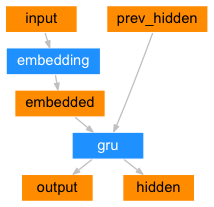

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# THE DECODER 

n the simplest seq2seq decoder we use only last output of the encoder. This last output is sometimes called the context vector as it encodes context from the entire sequence. This context vector is used as the initial hidden state of the decoder.

At every step of decoding, the decoder is given an input token and hidden state. The initial input token is the start-of-string `<SOS>` token, and the first hidden state is the context vector (the encoder’s last hidden state)

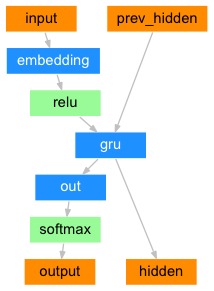

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
MAX_LENGTH = 150

# Attention Decoder

If only the context vector is passed betweeen the encoder and decoder, that single vector carries the burden of encoding the entire sentence.

Attention allows the decoder network to “focus” on a different part of the encoder’s outputs for every step of the decoder’s own outputs. First we calculate a set of attention weights. These will be multiplied by the encoder output vectors to create a weighted combination. The result (called `attn_applied` in the code) should contain information about that specific part of the input sequence, and thus help the decoder choose the right output words.

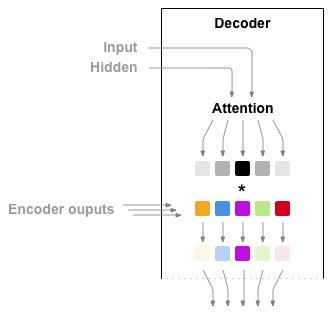

Calculating the attention weights is done with another feed-forward layer `attn`, using the decoder’s input and hidden state as inputs. Because there are sentences of all sizes in the training data, to actually create and train this layer we have to choose a maximum sentence length (input length, for encoder outputs) that it can apply to. Sentences of the maximum length will use all the attention weights, while shorter sentences will only use the first few

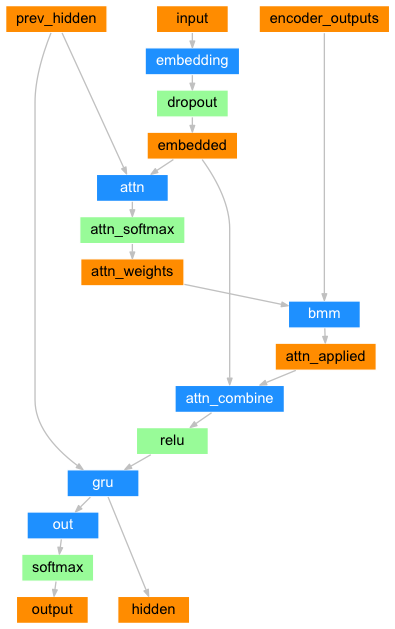

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Training

# PREPARE TRAINING

To train, for each pair we will need an input tensor (indexes of the words in the input sentence) and target tensor (indexes of the words in the target sentence). While creating these vectors we will append the EOS token to both sequences.

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

This is a helper function to print time elapsed and estimated time remaining given the current time and progress %.

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

# Training the Model

To train we run the input sentence through the encoder, and keep track of every output and the latest hidden state. Then the decoder is given the `<SOS>` token as its first input, and the last hidden state of the encoder as its first hidden state.

“Teacher forcing” is the concept of using the real target outputs as each next input, instead of using the decoder’s guess as the next input. Using teacher forcing causes it to converge faster but when the trained network is exploited, it may exhibit instability.

You can observe outputs of teacher-forced networks that read with coherent grammar but wander far from the correct translation - intuitively it has learned to represent the output grammar and can “pick up” the meaning once the teacher tells it the first few words, but it has not properly learned how to create the sentence from the translation in the first place.

Because of the freedom PyTorch’s autograd gives us, we can randomly choose to use teacher forcing or not with a simple if statement. Turn `teacher_forcing_ratio` up to use more of it.

In [ ]:
teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length


The whole training process looks like this:

*   Start a timer

*   Initialize optimizers and criterion
*   Create set of training pairs
*   Start empty losses array for plotting

Then we call `train `many times and occasionally print the progress (% of examples, time so far, estimated time) and average loss.



In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

# Evaluation

Evaluation is mostly the same as training, but there are no targets so we simply feed the decoder’s predictions back to itself for each step. Every time it predicts a word we add it to the output string, and if it predicts the EOS token we stop there. We also store the decoder’s attention outputs for display later

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

# Training and Evaluating

With all these helper functions in place (it looks like extra work, but it makes it easier to run multiple experiments) we can actually initialize a network and start training.



In [ ]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 50000, print_every=1000)

We can evaluate random sentences from the training set and print out the input, target, and output to make some subjective quality judgements:

In [ ]:
def evaluateRandomly(encoder, decoder, n=5):
    titles=list()
    abstracts=list()
    pred_abstracts=list()    
    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=150):
            continue
        else:
            if(i%1000==0):
                print(i*100/n,"% complete")
          
            #print('>', pair[0])
            titles.append(pair[0])
          #print('=', pair[1])
            abstracts.append(pair[1])
            output_words, attentions = evaluate(encoder, decoder, pair[0])
            output_sentence = ' '.join(output_words)
            pred_abstracts.append(output_sentence)
            #print('<', output_sentence)
            #print('')
    return(titles,abstracts,pred_abstracts)

In [ ]:
titles,abstracts,pred_abstracts=evaluateRandomly(encoder1, attn_decoder1,5000)

pred_df_GRU=pd.DataFrame()
pred_df_GRU['titles']=titles
pred_df_GRU['abstracts']=abstracts
pred_df_GRU['pred_abstracts']=pred_abstracts

In [ ]:
for i in range(100,105):
    print("original Summary>>>",pred_df_GRU.iloc[i]['abstracts'])
    print("Predicted Summary>>>",pred_df_GRU.iloc[i]['pred_abstracts'])
    print('-----------------------------------------------------------------------')